In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [2]:
keep_data_encoded = pd.read_csv(r"C:\Users\mjcanudo\Documents\Nova\ML\Project2\datasets\keep_data_enc.csv", index_col='Cust_ID')
all_data_encoded = pd.read_csv(r"C:\Users\mjcanudo\Documents\Nova\ML\Project2\datasets\all_data_enc.csv", index_col='Cust_ID')

keep_data_encoded_scaled =  pd.read_csv(r"C:\Users\mjcanudo\Documents\Nova\ML\Project2\datasets\keep_data_scl.csv", index_col='Cust_ID')
all_data_encoded_scaled = pd.read_csv(r"C:\Users\mjcanudo\Documents\Nova\ML\Project2\datasets\all_data_scl.csv", index_col='Cust_ID')

In [ ]:
all_data_encoded.info()

In [3]:
X_keep_svm = keep_data_encoded_scaled.drop(columns="Buy_product").copy()
y_keep_svm = keep_data_encoded_scaled["Buy_product"].copy()

X_all_svm = all_data_encoded_scaled.drop(columns="Buy_product").copy()
y_all_svm = all_data_encoded_scaled["Buy_product"].copy()

In [4]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


In [ ]:
param_grid_svm_rbf = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [7, 5, 3, 1, 0.5, 0.1,], 
              'kernel': ['rbf']}

grid_search = GridSearchCV(SVC(),
                        param_grid_svm_rbf,
                        scoring = 'f1',
                        return_train_score = True,
                        cv = 5,
                        verbose=1)

In [ ]:
grid_search.fit(X_keep_svm, y_keep_svm)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

In [ ]:
grid_search.fit(X_all_svm, y_all_svm)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

In [5]:
def select_best_models(data, model):
    skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)
    X = data.drop('Buy_product', axis = 1)
    y = data['Buy_product'].copy()

    score_train, score_val = [],[]

    # perform the cross-validation
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Scale the data
        scaler = MinMaxScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_val = scaler.transform(X_val)

        # Apply model
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return avg_train, std_train, avg_val, std_val

In [6]:
def show_results(df, data, *args):
    count = 0
    # for each instance of model passed as argument
    for arg in args:
        avg_train, std_train, avg_val, std_val = select_best_models(data, arg)
        # store the results in the right row
        df.iloc[count] = str(avg_train) + '+/-' + str(std_train), str(avg_val) + '+/-' + str(std_val)
        count+=1
    return df

In [ ]:
rbf_model_tunned_keep = SVC(kernel='rbf', C=100, gamma=0.5)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['RBF'])

show_results(df_all, keep_data_encoded, rbf_model_tunned_keep)

In [ ]:
rbf_model_tunned_keep = SVC(kernel='rbf', C=200, gamma=0.5)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['RBF'])

show_results(df_all, keep_data_encoded, rbf_model_tunned_keep)

In [ ]:
rbf_model_tunned_all = SVC(kernel='rbf', C=10, gamma=0.5)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['RBF'])

show_results(df_all, all_data_encoded, rbf_model_tunned_all)

In [ ]:
rbf_model_tunned_all = SVC(kernel='rbf', C=8, gamma=0.5)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['RBF'])

show_results(df_all, all_data_encoded, rbf_model_tunned_all)

In [ ]:
rbf_model_tunned_all = SVC(kernel='rbf', C=7, gamma=0.5)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['RBF'])

show_results(df_all, all_data_encoded, rbf_model_tunned_all)

In [ ]:
rbf_model_tunned_all = SVC(kernel='rbf', C=6, gamma=0.5)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['RBF'])

show_results(df_all, all_data_encoded, rbf_model_tunned_all)

In [ ]:
rbf_model_tunned_all = SVC(kernel='rbf', C=5, gamma=0.5)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['RBF'])

show_results(df_all, all_data_encoded, rbf_model_tunned_all)

In [ ]:
rbf_model_tunned_all = SVC(kernel='rbf', C=4, gamma=0.5)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['RBF'])

show_results(df_all, all_data_encoded, rbf_model_tunned_all)

In [ ]:
rbf_model_tunned_all = SVC(kernel='rbf', C=3, gamma=0.5)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['RBF'])

show_results(df_all, all_data_encoded, rbf_model_tunned_all)

In [ ]:
rbf_model_tunned_all = SVC(kernel='rbf', C=2, gamma=0.5)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['RBF'])

show_results(df_all, all_data_encoded, rbf_model_tunned_all)

In [7]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier()  

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['rf'])

show_results(df_all, all_data_encoded, rf)


In [ ]:
rf = RandomForestClassifier(n_estimators=300, max_depth=6)  

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['rf'])

show_results(df_all, all_data_encoded, rf)

In [ ]:
rf = RandomForestClassifier(n_estimators=300, max_depth=6, bootstrap=False)  

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['rf'])

show_results(df_all, all_data_encoded, rf)

In [ ]:
def show_results_forest(df_all, all_data_encoded, clf):
    X = keep_data_encoded.drop('Buy_product', axis=1)
    y = keep_data_encoded['Buy_product'].copy()

    skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)

    train_accuracies = []
    val_accuracies = []

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_val_pred = clf.predict(X_val)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    avg_train_accuracy = np.mean(train_accuracies)
    avg_val_accuracy = np.mean(val_accuracies)

    df_all.at['linear', 'Train'] = avg_train_accuracy
    df_all.at['linear', 'Validation'] = avg_val_accuracy

    print(f'Average Train Accuracy: {avg_train_accuracy:.2f}')
    print(f'Average Validation Accuracy: {avg_val_accuracy:.2f}')
    print(df_all)

In [ ]:
from sklearn.metrics import accuracy_score


In [15]:
clf = RandomForestClassifier(n_estimators=300, max_depth=6, bootstrap=False)  


df_all = pd.DataFrame(columns=['Train', 'Validation'], index=['linear'])

show_results_forest(df_all, all_data_encoded, clf)

Average Train Accuracy: 0.90
Average Validation Accuracy: 0.90
           Train Validation
linear  0.902993   0.900635


In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import AdaBoostClassifier 

In [16]:
X_train, X_val, Y_train, Y_val = train_test_split( 
    X_all_svm, y_all_svm, test_size=0.25, random_state=28)

In [21]:
adboost = AdaBoostClassifier() 
adb_model = adboost.fit(X_train,Y_train)

print("The accuracy of the model on validation set is", adb_model.score(X_val,Y_val))
 
# Result:
# The accuracy of the model on validation set is 0.8886608517188301

The accuracy of the model on validation set is 0.8886608517188301


In [22]:
adboost = AdaBoostClassifier() 

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['rf'])

show_results(df_all, all_data_encoded, adboost)

# Train 0.898+/-0.0
# Validation	0.897+/-0.01

,Train,Validation
rf,0.898+/-0.0,0.897+/-0.01


In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
gboost = GradientBoostingClassifier()

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['rf'])

show_results(df_all, all_data_encoded, gboost)

# Train 0.927+/-0.0
# Validation 0.923+/-0.01

,Train,Validation
rf,0.927+/-0.0,0.923+/-0.01


In [37]:
gboost = GradientBoostingClassifier(max_depth=3,
                                    n_estimators=500,
                                    n_iter_no_change=10,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    learning_rate=0.1)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['rf'])

show_results(df_all, all_data_encoded, gboost)

# Train 0.942+/-0.0
# Validation 0.93+/-0.0

,Train,Validation
rf,0.942+/-0.0,0.93+/-0.0


In [113]:
gboost = GradientBoostingClassifier(max_depth=4,
                                    n_estimators=120,
                                    n_iter_no_change=10,
                                    min_samples_leaf=8,
                                    min_samples_split=110,
                                    max_features=8,
                                    learning_rate=0.1,
                                    #random_state=40
                                    )

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['gboost'])

show_results(df_all, all_data_encoded, gboost)

# Train 0.939+/-0.0
# Validation 0.932+/-0.0

,Train,Validation
gboost,0.939+/-0.0,0.932+/-0.0


In [56]:
gboost = GradientBoostingClassifier(max_depth=3,
                                    n_estimators=320,
                                    n_iter_no_change=15,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    learning_rate=0.07)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['rf'])

show_results(df_all, all_data_encoded, gboost)

# Train 0.938+/-0.0
# Validation 0.929+/-0.01

,Train,Validation
rf,0.938+/-0.0,0.929+/-0.01


In [59]:
gboost = GradientBoostingClassifier(max_depth=3,
                                    n_estimators=120,
                                    n_iter_no_change=10,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    learning_rate=0.2)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['rf'])

show_results(df_all, keep_data_encoded, gboost)

# Train 0.923+/-0.0
# Validation 0.92+/-0.0

,Train,Validation
rf,0.923+/-0.0,0.92+/-0.0


The learning_rate hyperparameter scales the contribution of each tree. If you
set it to a low value, such as 0.05, you will need more trees in the ensemble to
fit the training set, but the predictions will usually generalize better. This is a
regularization technique called shrinkage.

testing low learning_rate with high number of estimators:

In [63]:
# param_grid_gboost = {'max_depth': [2, 3, 4, 6],  
#                 'n_estimators': [100, 140, 180, 240, 300],
#                 'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1]}

# grid_search = GridSearchCV(GradientBoostingClassifier(),
#                         param_grid_gboost,
#                         scoring = 'f1',
#                         return_train_score = True,
#                         cv = 5,
#                         verbose=1)

# grid_search.fit(X_all_svm, y_all_svm)

# # Print the best hyperparameters and corresponding score
# print("Best Hyperparameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

# Results:
# Fitting 5 folds for each of 140 candidates, totalling 700 fits
# Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 180}
# Best Score:  0.939732330118457

Fitting 5 folds for each of 140 candidates, totalling 700 fits
Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 180}
Best Score:  0.939732330118457


In [61]:
param_grid_gboost = {'max_depth': [2, 3, 4],  
                'n_estimators': [100, 140, 180, 240, 300],
                'learning_rate': [0.1, 0.3, 0.5, 0.7, 1]}

grid_search = GridSearchCV(GradientBoostingClassifier(),
                        param_grid_gboost,
                        scoring = 'f1',
                        return_train_score = True,
                        cv = 5,
                        verbose=1)

grid_search.fit(X_all_svm, y_all_svm)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Results:
# Fitting 5 folds for each of 75 candidates, totalling 375 fits
# Best Hyperparameters:  {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 140}
# Best Score:  0.9378758487153014

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best Hyperparameters:  {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 140}
Best Score:  0.9378758487153014


testing the low parameters

In [15]:
gboost = GradientBoostingClassifier(max_depth=4,
                                    n_estimators=60,
                                    learning_rate=0.5)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['gboost'])

show_results(df_all, all_data_encoded, gboost)

# Results:
# Train 0.963+/-0.0
# Validation 0.933+/-0.0

,Train,Validation
gboost,0.963+/-0.0,0.933+/-0.0


In [14]:
gboost = GradientBoostingClassifier(max_depth=6,
                                    n_estimators=180,
                                    n_iter_no_change=8,
                                    min_samples_split=15,
                                    min_samples_leaf=15,
                                    learning_rate=0.1,
                                    random_state=40)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['gboost'])

show_results(df_all, all_data_encoded, gboost)

# Results:
# Train 0.983+/-0.0
# Validation 0.94+/-0.0

,Train,Validation
gboost,0.964+/-0.0,0.938+/-0.0


In [19]:
gboost = GradientBoostingClassifier(max_depth=6,
                                    n_estimators=180,
                                    n_iter_no_change=8,
                                    min_samples_split=15,
                                    min_samples_leaf=15,
                                    learning_rate=0.1,
                                    random_state=40)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['gboost'])

show_results(df_all, all_data_encoded, gboost)

# Results:
# Train 0.983+/-0.0
# Validation 0.94+/-0.0

,Train,Validation
gboost,0.971+/-0.0,0.937+/-0.0


In [27]:
gboost = GradientBoostingClassifier(max_depth=6,
                                    min_samples_split=15,
                                    min_samples_leaf=15,
                                    n_iter_no_change=10,
                                    n_estimators=180,
                                    learning_rate=0.1,
                                    random_state=40)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['gboost'])

show_results(df_all, all_data_encoded, gboost)


,Train,Validation
gboost,0.97+/-0.0,0.938+/-0.0


In [10]:
gboost = GradientBoostingClassifier(max_depth=6,
                                    min_samples_split=16,
                                    min_samples_leaf=6,
                                    n_iter_no_change=8,
                                    n_estimators=180,
                                    learning_rate=0.1,
                                    max_features=7,
                                    random_state=40)

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['gboost'])

show_results(df_all, keep_data_encoded, gboost)

# Results:
# Train 0.97+/-0.0
# Validation 0.938+/-0.0

,Train,Validation
gboost,0.935+/-0.0,0.924+/-0.0


In [37]:
# param_grid_gboost = {'max_depth': [5, 6],  
#                 'n_estimators': [180],
#                 'learning_rate': [0.1],
#                 'min_samples_split':[4, 6, 10, 16, 25],
#                 'min_samples_leaf':[4, 6, 10, 16, 25],
#                 'max_features':[3, 4, 5, 6, 7]                
#                 }

# grid_search = GridSearchCV(GradientBoostingClassifier(),
#                         param_grid_gboost,
#                         scoring = 'f1',
#                         return_train_score = True,
#                         cv = 5,
#                         verbose=1,
#                         n_jobs=-1)

# grid_search.fit(X_all_svm, y_all_svm)

# # Print the best hyperparameters and corresponding score
# print("Best Hyperparameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

# Fitting 5 folds for each of 250 candidates, totalling 1250 fits
# Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 6, 'min_samples_split': 16, 'n_estimators': 180}
# Best Score:  0.9408123504690303

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 6, 'min_samples_split': 16, 'n_estimators': 180}
Best Score:  0.9408123504690303


In [62]:

param_grid_gboost = {'max_depth': [2, 3, 4],  
                'n_estimators': [20, 40, 60, 100, 250],
                'learning_rate': [0.5, 1, 1.5, 2, 4]}

grid_search = GridSearchCV(GradientBoostingClassifier(),
                        param_grid_gboost,
                        scoring = 'f1',
                        return_train_score = True,
                        cv = 5,
                        verbose=1)

grid_search.fit(X_all_svm, y_all_svm)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Results:
# Fitting 5 folds for each of 75 candidates, totalling 375 fits
# Best Hyperparameters:  {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 60}
# Best Score:  0.9357856025478292

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best Hyperparameters:  {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 60}
Best Score:  0.9357856025478292


In [11]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
stacking_clf = StackingClassifier(
        estimators=[
            ('GBoost', GradientBoostingClassifier(
                                    max_depth=3,
                                    n_estimators=120,
                                    n_iter_no_change=10,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    learning_rate=0.2)),
            ('SVC', SVC(
                    kernel='rbf',
                    C=0.3,
                    gamma=5))],
        final_estimator=SVC(
                    kernel='rbf',
                    C=0.3,
                    gamma=5),
        cv=5,
        verbose=1,
        n_jobs=-1
        )

#stacking_clf.fit(X_all_svm, y_all_svm)

In [17]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['stack'])

show_results(df_all, all_data_encoded, stacking_clf)

,Train,Validation
stack,0.949+/-0.0,0.93+/-0.01


In [55]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['stack'])

show_results(df_all, all_data_encoded, stacking_clf)

,Train,Validation
stack,0.946+/-0.0,0.932+/-0.0


In [57]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['stack'])

show_results(df_all, all_data_encoded, stacking_clf)

,Train,Validation
stack,0.949+/-0.0,0.933+/-0.01


In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [28]:
final_model_gboost = GradientBoostingClassifier(max_depth=4,
                                    n_estimators=120,
                                    n_iter_no_change=10,
                                    min_samples_leaf=8,
                                    min_samples_split=110,
                                    max_features=8,
                                    learning_rate=0.1,
                                    )
final_model_svm = SVC(kernel='rbf', C=3, gamma=0.5, probability=True)

In [7]:
x_data = all_data_encoded.drop(columns="Buy_product").copy()
y_data = all_data_encoded["Buy_product"].copy()

In [10]:
X_train, X_val, y_train, y_val = train_test_split(x_data, y_data,
                                                  train_size = 0.8,
                                                  random_state = 99,
                                                  stratify = y_data)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)


model_gboost = final_model_gboost.fit(X_train, y_train)
model_svm = final_model_svm.fit(X_train, y_train)



NameError: name 'train_test_split' is not defined

In [31]:
prob_modelGBOOST = model_gboost.predict_proba(X_val)
prob_modelSVM =  model_svm.predict_proba(X_val)


In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

In [34]:
fpr_modelGBOOST, tpr_modelGBOOST, thresholds_modelGBOOST = roc_curve(y_true = y_val, y_score = prob_modelGBOOST[:,1])
fpr_modelSVM, tpr_modelSVM, thresholds_modelSVM = roc_curve(y_val, prob_modelSVM[:,1])


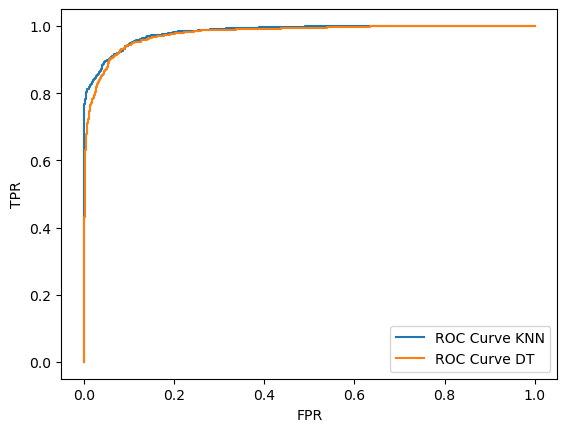

In [35]:
plt.plot(fpr_modelGBOOST, tpr_modelGBOOST,label="ROC Curve KNN")
plt.plot(fpr_modelSVM, tpr_modelSVM, label="ROC Curve DT")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [37]:
roc_auc_modelGBOOST = roc_auc_score(y_val, prob_modelGBOOST[:, 1])
roc_auc_modelSVM = roc_auc_score(y_val, prob_modelSVM[:, 1])
print(roc_auc_modelGBOOST )
print(roc_auc_modelSVM)



0.9823071743226388
0.9772203314491945


In [12]:
from sklearn.metrics import precision_recall_curve

In [79]:
final_model = final_model_gboost.fit(X_train, y_train)

In [80]:
predict_proba = final_model.predict_proba(X_val)


Best Threshold=0.394843, F-Score=0.935


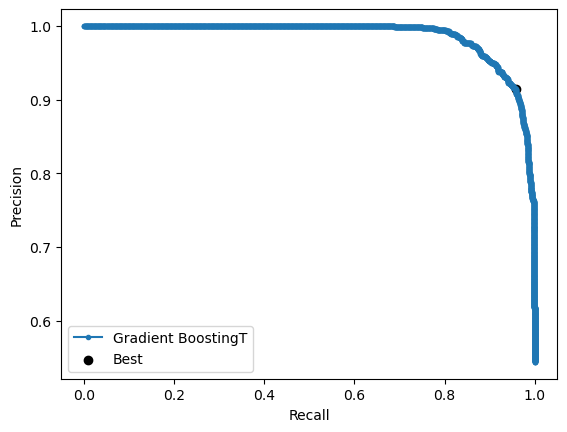

In [81]:
precision, recall, thresholds = precision_recall_curve(y_val, predict_proba[:,1])

# Compute F1 score, avoid division by zero
fscore = np.where((precision + recall) > 0, (2 * precision * recall) / (precision + recall), 0)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

plt.plot(recall, precision, marker='.', label='Gradient BoostingT')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [ ]:
# Gradient Boosting (OK)
final_model_gboost = GradientBoostingClassifier(max_depth=4,
                                    n_estimators=120,
                                    n_iter_no_change=10,
                                    min_samples_leaf=8,
                                    min_samples_split=110,
                                    max_features=8,
                                    learning_rate=0.1,
                                    )

# SVM (OK)
final_model_svm = SVC(kernel='rbf', C=3, gamma=0.5, probability=True)

#DT (ok)
final_model_dt_2 = DecisionTreeClassifier(splitter='best',
    min_samples_split=10,
    min_samples_leaf=1,
    min_impurity_decrease=0.0,
    max_leaf_nodes=None,
    max_features=None,
    max_depth=9,
    criterion='gini',
    ccp_alpha=0.0,
    random_state=99
)

#Random Forest (OK)
model_RF_final = RandomForestClassifier(n_estimators=300, max_depth=6)

#KNN (OK)
model_KNN_tuned_kd = KNeighborsClassifier(n_neighbors=7, weights= 'uniform', algorithm= 'auto', p=1)

#NN (OK)
model_NN_final = MLPClassifier(hidden_layer_sizes = 20, max_iter = 2000, random_state = 99)